## Introduction to Machine Learning Models 

### The Chicgao Bears Team Performance Analysis Trends Throughout the 2022-2023 season

### Win-Loss Prediction Model: Building a model to predict whether a team will win or lose a future game based on historical data such as points scored, points allowed, total yards, and turnovers.

Team Performance Trend Analysis: Create a model that identifies trends in a team’s performance over the season, such as improving or declining defense, offense efficiency, etc.



Creating a basic model for team performance trend analysis is a great idea, especially if you're interested in understanding how a team's performance changes over time. Here's a step-by-step guide to get you started:

__1. Data Collection__
Source: Obtain data from the "Schedule & Game Results" table on the Pro-Football-Reference.com website for the team you're interested in. Ensure you have data for multiple seasons for a more comprehensive analysis.
Fields to Consider: Win/Loss, Points Scored, Points Allowed, Total Yards, Turnovers, and any other statistics that might impact performance.

__2. Data Preprocessing__
Cleaning: Ensure the data is free from errors or missing values.
Normalization/Standardization: If using data from different scales, normalize or standardize your data.
Feature Engineering: Create new features that might be useful, like running averages or differences between consecutive games.

__3. Exploratory Data Analysis (EDA)__
Visualizations: Plot graphs (like line charts or bar graphs) to visualize trends over time.
Correlation Analysis: Check if there are any strong correlations between different statistics and winning.

<strong>4. Selecting a Model </strong>
Since you're a beginner, start with simple models. Examples include:
Linear Regression: To see if there’s a linear trend in performance over time.
Time Series Analysis (like ARIMA): If you want to model the data as a series over time.
Moving Average: To smooth out short-term fluctuations and highlight longer-term trends.

__5. Model Training__
Split the Data: Use historical data for training and recent data for testing.
Train the Model: Use a machine learning library like scikit-learn in Python to train your model.

__6. Evaluation__
Metrics: Evaluate your model using metrics like Mean Squared Error (MSE) or R-squared for regression models.
Visualization: Plot the model's predictions against actual data to visually assess performance.

__7. Insights and Reporting__
Interpret Results: Understand what your model's output means in the context of team performance.
Report: Prepare a report or a visualization dashboard to present your findings.

__Tools and Libraries__
Python: A popular programming language for data science.
Pandas: For data manipulation and analysis.
Matplotlib/Seaborn: For data visualization.
Scikit-Learn: For implementing machine learning models.

## Step 1. Install new packages for project

In [17]:
#Seaborn as a high-level interface for drawing attractive and informative statistical graphics. 
#pip install seaborn
#pip install scikit-learn

SyntaxError: invalid syntax (3481745067.py, line 3)

## Step 2. Import libraries that may be used as tools. 

In [10]:
# Import our data processing library (note: you may have to install this!)
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#import sklearn
#import scipy

## Step 3. Upload Data Set
#### Data used for this analysis is from https://www.pro-football-reference.com/teams/chi/2023.htm and was harvested on 01-12-23. Data was cleaned and columns were reformatted for ease of use in google sheets prior to downloading as a .csv file to the desktop file "NFL_Data". 

In [80]:
# Let's use this to upload a sample dataset and show the start of the dataset
filepath = "/Users/madelineprestegaard/Desktop/NFL_Data/ChiBears_2023_GameLog_Stats.csv"
seasondata= pd.read_csv(filepath)
seasondata




,Week,Day,Date,Time,Result,OT,Rec,Location,Opp,Passer,...,RushY_Off,TO_Off,First_Drive_Def,TotYd_Def,PassY_Def,RushY_Def,TO_Def,ExpPoints_Off,ExpPoints_Def,Exp_Points_Spt
0,1,Sun,September 10,4:25PM ET,L,NaN,0-1,Home,Green Bay Packers,J. Fields,...,122,2,15,329,237,92,NaN,-6.45,-8.05,-2.11
1,2,Sun,September 17,1:00PM ET,L,NaN,0-2,Away,Tampa Bay Buccaneers,J. Fields,...,67,2,19,437,317,120,NaN,-7.04,-14.15,8.78
2,3,Sun,September 24,4:25PM ET,L,NaN,0-3,Away,Kansas City Chiefs,J. Fields,...,116,2,31,456,303,153,2,-13.6,-20.09,1.47
3,4,Sun,October 1,1:00PM ET,L,NaN,0-4,NaN,Denver Broncos,J. Fields,...,171,2,17,311,214,97,NaN,13.11,-13.54,-1.5
4,5,Thu,October 5,8:15PM ET,W,NaN,1-4,Away,Washington Commanders,J. Fields,...,178,NaN,23,388,359,29,2,19.81,-4.63,0.51
5,6,Sun,October 15,1:00PM ET,L,NaN,1-5,NaN,Minnesota Vikings,J. Fields,...,162,3,12,220,174,46,1,-15.39,8.38,-0.79
6,7,Sun,October 22,1:00PM ET,W,NaN,2-5,NaN,Las Vegas Raiders,T. Bagent,...,173,NaN,20,235,196,39,3,12.58,6.37,2.41
7,8,Sun,October 29,8:20PM ET,L,NaN,2-6,Away,Los Angeles Chargers,T. Bagent,...,73,2,20,352,298,54,1,-6.71,-7.29,-5.12
8,9,Sun,November 5,1:00PM ET,L,NaN,2-7,Away,New Orleans Saints,T. Bagent,...,156,5,18,301,214,87,NaN,-5.71,-5.1,-3.16
9,10,Thu,November 9,8:15PM ET,W,NaN,3-7,NaN,Carolina Panthers,T. Bagent,...,133,NaN,12,213,170,43,NaN,-0.42,6.28,-1.84


In [81]:
#Remove the Bye week from our data analysis project
seasondata = seasondata[seasondata['Week'] != 13]
assert seasondata[seasondata['Week'] == 13].empty
#Can check the abscence of the bye week 
seasondata

,Week,Day,Date,Time,Result,OT,Rec,Location,Opp,Passer,...,RushY_Off,TO_Off,First_Drive_Def,TotYd_Def,PassY_Def,RushY_Def,TO_Def,ExpPoints_Off,ExpPoints_Def,Exp_Points_Spt
0,1,Sun,September 10,4:25PM ET,L,NaN,0-1,Home,Green Bay Packers,J. Fields,...,122,2,15,329,237,92,NaN,-6.45,-8.05,-2.11
1,2,Sun,September 17,1:00PM ET,L,NaN,0-2,Away,Tampa Bay Buccaneers,J. Fields,...,67,2,19,437,317,120,NaN,-7.04,-14.15,8.78
2,3,Sun,September 24,4:25PM ET,L,NaN,0-3,Away,Kansas City Chiefs,J. Fields,...,116,2,31,456,303,153,2,-13.6,-20.09,1.47
3,4,Sun,October 1,1:00PM ET,L,NaN,0-4,NaN,Denver Broncos,J. Fields,...,171,2,17,311,214,97,NaN,13.11,-13.54,-1.5
4,5,Thu,October 5,8:15PM ET,W,NaN,1-4,Away,Washington Commanders,J. Fields,...,178,NaN,23,388,359,29,2,19.81,-4.63,0.51
5,6,Sun,October 15,1:00PM ET,L,NaN,1-5,NaN,Minnesota Vikings,J. Fields,...,162,3,12,220,174,46,1,-15.39,8.38,-0.79
6,7,Sun,October 22,1:00PM ET,W,NaN,2-5,NaN,Las Vegas Raiders,T. Bagent,...,173,NaN,20,235,196,39,3,12.58,6.37,2.41
7,8,Sun,October 29,8:20PM ET,L,NaN,2-6,Away,Los Angeles Chargers,T. Bagent,...,73,2,20,352,298,54,1,-6.71,-7.29,-5.12
8,9,Sun,November 5,1:00PM ET,L,NaN,2-7,Away,New Orleans Saints,T. Bagent,...,156,5,18,301,214,87,NaN,-5.71,-5.1,-3.16
9,10,Thu,November 9,8:15PM ET,W,NaN,3-7,NaN,Carolina Panthers,T. Bagent,...,133,NaN,12,213,170,43,NaN,-0.42,6.28,-1.84


## Step 3. Exploratory Data Analysis

#### Let's explore the data!

In [82]:
#Next, let's make sure they are all the correct data type before moving on. 
seasondata.dtypes

Week                int64
Day                object
Date               object
Time               object
Result             object
OT                 object
Rec                object
Location           object
Opp                object
Passer             object
Pts_Scored         object
Pts_Allowed        object
First_Drive_Off    object
TotYd_Off          object
PassY_Off          object
RushY_Off          object
TO_Off             object
First_Drive_Def    object
TotYd_Def          object
PassY_Def          object
RushY_Def          object
TO_Def             object
ExpPoints_Off      object
ExpPoints_Def      object
Exp_Points_Spt     object
dtype: object

In [83]:
#Make changes as neccessary


seasondata['Opp'] = seasondata['Opp'].astype(str)
seasondata['Passer'] = seasondata['Passer'].astype(str)
seasondata['Pts_Scored'] = pd.to_numeric(seasondata['Pts_Scored'], errors='coerce')
seasondata['Pts_Allowed'] = pd.to_numeric(seasondata['Pts_Allowed'], errors='coerce')
seasondata['First_Drive_Off'] = pd.to_numeric(seasondata['First_Drive_Off'], errors='coerce')
seasondata['TotYd_Off'] = pd.to_numeric(seasondata['TotYd_Off'], errors='coerce')
seasondata['PassY_Off'] = pd.to_numeric(seasondata['PassY_Off'], errors='coerce')
seasondata['RushY_Off'] = pd.to_numeric(seasondata['RushY_Off'], errors='coerce')
seasondata['TO_Off'] = pd.to_numeric(seasondata['TO_Off'], errors='coerce')
seasondata['First_Drive_Def'] = pd.to_numeric(seasondata['First_Drive_Def'], errors='coerce')
seasondata['TotYd_Def'] = pd.to_numeric(seasondata['TotYd_Def'], errors='coerce')
seasondata['PassY_Def'] = pd.to_numeric(seasondata['PassY_Def'], errors='coerce')
seasondata['RushY_Def'] = pd.to_numeric(seasondata['RushY_Def'], errors='coerce')
seasondata['TO_Def'] = pd.to_numeric(seasondata['TO_Def'], errors='coerce')
seasondata['ExpPoints_Off'] = pd.to_numeric(seasondata['ExpPoints_Off'], errors='coerce')
seasondata['ExpPoints_Def'] = pd.to_numeric(seasondata['ExpPoints_Def'], errors='coerce')
seasondata['Exp_Points_Spt'] = pd.to_numeric(seasondata['Exp_Points_Spt'], errors='coerce')
seasondata.dtypes


/var/folders/zc/9ks95q_s0pq03w8cqz_xssd40000gn/T/ipykernel_34576/2894405483.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasondata['Opp'] = seasondata['Opp'].astype(str)
/var/folders/zc/9ks95q_s0pq03w8cqz_xssd40000gn/T/ipykernel_34576/2894405483.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasondata['Passer'] = seasondata['Passer'].astype(str)
/var/folders/zc/9ks95q_s0pq03w8cqz_xssd40000gn/T/ipykernel_34576/2894405483.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

Week                 int64
Day                 object
Date                object
Time                object
Result              object
OT                  object
Rec                 object
Location            object
Opp                 object
Passer              object
Pts_Scored           int64
Pts_Allowed          int64
First_Drive_Off      int64
TotYd_Off            int64
PassY_Off            int64
RushY_Off            int64
TO_Off             float64
First_Drive_Def      int64
TotYd_Def            int64
PassY_Def            int64
RushY_Def            int64
TO_Def             float64
ExpPoints_Off      float64
ExpPoints_Def      float64
Exp_Points_Spt     float64
dtype: object

Text(0.5, 1.0, 'Win/Loss Distribution')

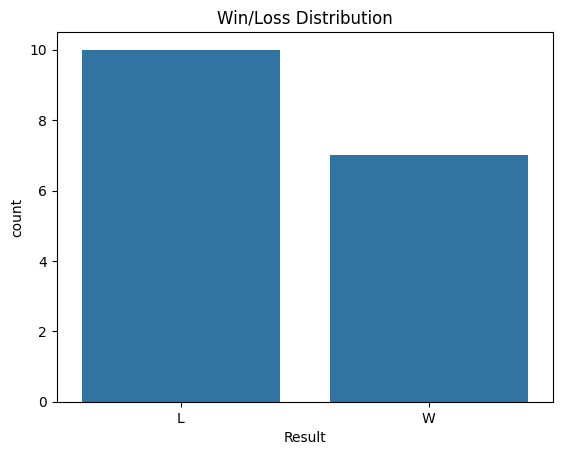

In [84]:
sns.countplot(x='Result', data=seasondata)
plt.title('Win/Loss Distribution')

In [86]:
# Plot for Points Scored
points_scored = alt.Chart(seasondata).mark_line(point=True, color='blue').encode(
    x='Week:N',  # N for nominal (categorical) data
    y='Pts_Scored:Q',  # Q for quantitative data
    tooltip=['Week:N', 'Pts_Scored:Q', 'Passer:N', 'Opp:N']  # Ensure correct encoding
).properties(
    title='Points Scored'
)

# Plot for Points Allowed
points_allowed = alt.Chart(seasondata).mark_line(point=True, color='red').encode(
    x='Week:N',
    y='Pts_Allowed:Q',
    tooltip=['Week:N', 'Pts_Allowed:Q', 'Opp:N']
).properties(
    title='Points Allowed'
)

# Combine the plots
pts_scored_pts_allowed = alt.layer(points_scored, points_allowed).resolve_scale(
    y='independent'
).properties(
    title='Comparison of Points Scored and Points Allowed per Week'
)

pts_scored_pts_allowed

alt.LayerChart(...)

In [88]:
#Correlation Heatmap using seaborn to idenrify any strong correlation between statistical measures


Text(0.5, 1.0, 'Distribution of Offensive Total Yards and Turnovers')

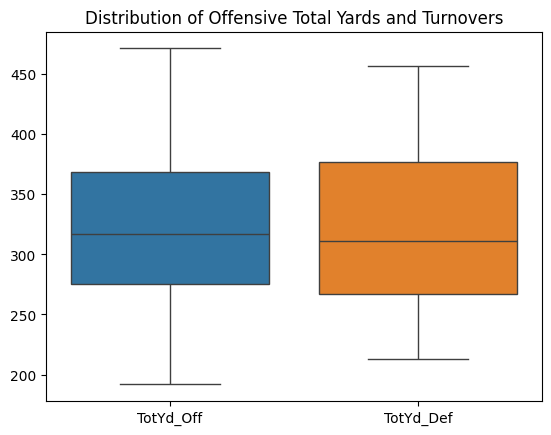

In [90]:
#statistical Distribution of Key metrics-- to understnad the distribution of key statistics like otal years, TOs, ect.
sns.boxplot(data=seasondata[['TotYd_Off', 'TotYd_Def']])
plt.title('Distribution of Offensive Total Yards and Turnovers')


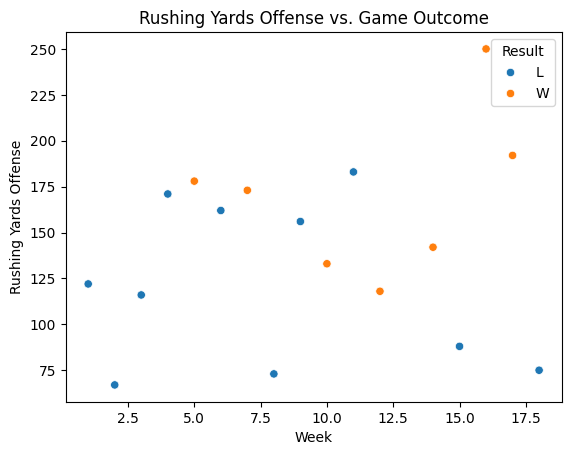

In [93]:
# HOw Rushing Yards affect the outcome of the game:
# Scatter Plot with Win/Loss as Hue
sns.scatterplot(x='Week', y='RushY_Off', hue='Result', data=seasondata)
plt.title('Rushing Yards Offense vs. Game Outcome')
plt.xlabel('Week')
plt.ylabel('Rushing Yards Offense')
plt.show()

In [94]:
# Correlation Analysis 
# First, convert W/L to numeric (assuming 'W' for win and 'L' for loss)
seasondata['W/L_numeric'] = seasondata['Result'].map({'W': 1, 'L': 0})

# Calculate correlation
correlation = seasondata['RushY_Off'].corr(seasondata['W/L_numeric'])

print('Correlation between Rushing Yards Offense and Game Outcome:', correlation)

Correlation between Rushing Yards Offense and Game Outcome: 0.4942177277094836


/var/folders/zc/9ks95q_s0pq03w8cqz_xssd40000gn/T/ipykernel_34576/3043193335.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasondata['W/L_numeric'] = seasondata['Result'].map({'W': 1, 'L': 0})
